In [ ]:
       N3IC - NSDI 2022

  File:     iot_dataset.ipynb
  Authors:  Roberto Bifulco (Roberto.Bifulco@neclab.eu)
            Giuseppe Siracusano (Giuseppe.Siracusano@neclab.eu)
            Davide Sanvito (Davide.Sanvito@neclab.eu)

NEC Laboratories Europe GmbH, Copyright (c) 2022, All rights reserved.

       THIS HEADER MAY NOT BE EXTRACTED OR MODIFIED IN ANY WAY.

       PROPRIETARY INFORMATION ---

SOFTWARE LICENSE AGREEMENT

ACADEMIC OR NON-PROFIT ORGANIZATION NONCOMMERCIAL RESEARCH USE ONLY

BY USING OR DOWNLOADING THE SOFTWARE, YOU ARE AGREEING TO THE TERMS OF THIS
LICENSE AGREEMENT.  IF YOU DO NOT AGREE WITH THESE TERMS, YOU MAY NOT USE OR
DOWNLOAD THE SOFTWARE.

This is a license agreement ("Agreement") between your academic institution
or non-profit organization or self (called "Licensee" or "You" in this
Agreement) and NEC Laboratories Europe GmbH (called "Licensor" in this
Agreement).  All rights not specifically granted to you in this Agreement
are reserved for Licensor.

RESERVATION OF OWNERSHIP AND GRANT OF LICENSE: Licensor retains exclusive
ownership of any copy of the Software (as defined below) licensed under this
Agreement and hereby grants to Licensee a personal, non-exclusive,
non-transferable license to use the Software for noncommercial research
purposes, without the right to sublicense, pursuant to the terms and
conditions of this Agreement. NO EXPRESS OR IMPLIED LICENSES TO ANY OF
LICENSOR'S PATENT RIGHTS ARE GRANTED BY THIS LICENSE. As used in this
Agreement, the term "Software" means (i) the actual copy of all or any
portion of code for program routines made accessible to Licensee by Licensor
pursuant to this Agreement, inclusive of backups, updates, and/or merged
copies permitted hereunder or subsequently supplied by Licensor,  including
all or any file structures, programming instructions, user interfaces and
screen formats and sequences as well as any and all documentation and
instructions related to it, and (ii) all or any derivatives and/or
modifications created or made by You to any of the items specified in (i).

CONFIDENTIALITY/PUBLICATIONS: Licensee acknowledges that the Software is
proprietary to Licensor, and as such, Licensee agrees to receive all such
materials and to use the Software only in accordance with the terms of this
Agreement.  Licensee agrees to use reasonable effort to protect the Software
from unauthorized use, reproduction, distribution, or publication. All
publication materials mentioning features or use of this software must
explicitly include an acknowledgement the software was developed by NEC
Laboratories Europe GmbH.

COPYRIGHT: The Software is owned by Licensor.

PERMITTED USES:  The Software may be used for your own noncommercial
internal research purposes. You understand and agree that Licensor is not
obligated to implement any suggestions and/or feedback you might provide
regarding the Software, but to the extent Licensor does so, you are not
entitled to any compensation related thereto.

DERIVATIVES: You may create derivatives of or make modifications to the
Software, however, You agree that all and any such derivatives and
modifications will be owned by Licensor and become a part of the Software
licensed to You under this Agreement.  You may only use such derivatives and
modifications for your own noncommercial internal research purposes, and you
may not otherwise use, distribute or copy such derivatives and modifications
in violation of this Agreement.

BACKUPS:  If Licensee is an organization, it may make that number of copies
of the Software necessary for internal noncommercial use at a single site
within its organization provided that all information appearing in or on the
original labels, including the copyright and trademark notices are copied
onto the labels of the copies.

USES NOT PERMITTED:  You may not distribute, copy or use the Software except
as explicitly permitted herein. Licensee has not been granted any trademark
license as part of this Agreement.  Neither the name of NEC Laboratories
Europe GmbH nor the names of its contributors may be used to endorse or
promote products derived from this Software without specific prior written
permission.

You may not sell, rent, lease, sublicense, lend, time-share or transfer, in
whole or in part, or provide third parties access to prior or present
versions (or any parts thereof) of the Software.

ASSIGNMENT: You may not assign this Agreement or your rights hereunder
without the prior written consent of Licensor. Any attempted assignment
without such consent shall be null and void.

TERM: The term of the license granted by this Agreement is from Licensee's
acceptance of this Agreement by downloading the Software or by using the
Software until terminated as provided below.

The Agreement automatically terminates without notice if you fail to comply
with any provision of this Agreement.  Licensee may terminate this Agreement
by ceasing using the Software.  Upon any termination of this Agreement,
Licensee will delete any and all copies of the Software. You agree that all
provisions which operate to protect the proprietary rights of Licensor shall
remain in force should breach occur and that the obligation of
confidentiality described in this Agreement is binding in perpetuity and, as
such, survives the term of the Agreement.

FEE: Provided Licensee abides completely by the terms and conditions of this
Agreement, there is no fee due to Licensor for Licensee's use of the
Software in accordance with this Agreement.

DISCLAIMER OF WARRANTIES:  THE SOFTWARE IS PROVIDED "AS-IS" WITHOUT WARRANTY
OF ANY KIND INCLUDING ANY WARRANTIES OF PERFORMANCE OR MERCHANTABILITY OR
FITNESS FOR A PARTICULAR USE OR PURPOSE OR OF NON- INFRINGEMENT.  LICENSEE
BEARS ALL RISK RELATING TO QUALITY AND PERFORMANCE OF THE SOFTWARE AND
RELATED MATERIALS.

SUPPORT AND MAINTENANCE: No Software support or training by the Licensor is
provided as part of this Agreement.

EXCLUSIVE REMEDY AND LIMITATION OF LIABILITY: To the maximum extent
permitted under applicable law, Licensor shall not be liable for direct,
indirect, special, incidental, or consequential damages or lost profits
related to Licensee's use of and/or inability to use the Software, even if
Licensor is advised of the possibility of such damage.

EXPORT REGULATION: Licensee agrees to comply with any and all applicable
export control laws, regulations, and/or other laws related to embargoes and
sanction programs administered by law.

SEVERABILITY: If any provision(s) of this Agreement shall be held to be
invalid, illegal, or unenforceable by a court or other tribunal of competent
jurisdiction, the validity, legality and enforceability of the remaining
provisions shall not in any way be affected or impaired thereby.

NO IMPLIED WAIVERS: No failure or delay by Licensor in enforcing any right
or remedy under this Agreement shall be construed as a waiver of any future
or other exercise of such right or remedy by Licensor.

GOVERNING LAW: This Agreement shall be construed and enforced in accordance
with the laws of Germany without reference to conflict of laws principles.
You consent to the personal jurisdiction of the courts of this country and
waive their rights to venue outside of Germany.

ENTIRE AGREEMENT AND AMENDMENTS: This Agreement constitutes the sole and
entire agreement between Licensee and Licensor as to the matter set forth
herein and supersedes any previous agreements, understandings, and
arrangements between the parties relating hereto.

       THIS HEADER MAY NOT BE EXTRACTED OR MODIFIED IN ANY WAY.

In [53]:
from __future__ import print_function

import larq as lq
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import tensorflow as tf

np.random.seed(1337)

### Dataset

In [52]:
device_list = pd.read_csv('datasets/UNSW_IOT/List_Of_Devices.txt', sep='\t+', engine='python')
data_df = pd.read_csv('datasets/UNSW_IOT/dataset.csv')

In [3]:
# Add DeviceName column from List_Of_Devices.txt

device_list['MAC ADDRESS'] = device_list['MAC ADDRESS'].str.strip()
macs = set(data_df.SrcMac.unique()).union( set(data_df.DstMac.unique()) )

mac_to_device = {}
for m in macs:
    dev_name = device_list[device_list['MAC ADDRESS'] == m]['List of Devices'].values
    if len(dev_name) == 0:
        mac_to_device[m] = None
    else:
        mac_to_device[m] = dev_name[0]

def mac_label(x, labels):
    if x['SrcMac'] == 'ff:ff:ff:ff:ff:ff':
        label_mac = x['DstMac']
    elif x['DstMac'] == 'ff:ff:ff:ff:ff:ff':
        label_mac = x['SrcMac']
    elif x['SrcMac'] == '14:cc:20:51:33:ea':
        label_mac = x['DstMac']
    elif x['DstMac'] == '14:cc:20:51:33:ea':
        label_mac = x['SrcMac']
    else:
        return None
    
    return labels[label_mac]

data_df['DeviceName'] = data_df.apply(lambda x: mac_label(x, mac_to_device), axis=1)

In [4]:
# Data pre-processing

columns_to_drop = ['State', 'Dir', 'SrcMac', 'DstMac', 'SrcAddr', 'DstAddr',
                   'StartTime', 'TotPkts', 'TotBytes', 'Flgs', 'Sport', 'Dport']
data_df = data_df.drop(columns_to_drop, axis=1)

cols = ['Proto']
for col in cols:
    data_df[col] =  data_df[col].astype('category')
    data_df[col] =  data_df[col].cat.codes

# Removing rows with NaN in any column
data_df.dropna(inplace=True)

In [5]:
SAMPLES_PER_CLS_THRESHOLD = 40000

to_classify = []
for item in data_df.DeviceName.value_counts().items():
    if (item[1] > SAMPLES_PER_CLS_THRESHOLD and not (item[0] in ['Laptop', 'Samsung Galaxy Tab', 'MacBook'])):
        print(item)
        to_classify.append(item[0])
len(to_classify)

assert len(to_classify) == 9, 'Tune SAMPLES_PER_CLS_THRESHOLD to obtain 9 classes (got %d)' % len(to_classify)
# to_classify = [x.rstrip() for x in to_classify]

('Dropcam ', 975267)
('Amazon Echo ', 295596)
('Smart Things ', 135492)
('Withings Smart Baby Monitor ', 133071)
('Insteon Camera ', 69201)
('Samsung SmartCam ', 61099)
('Triby Speaker ', 51016)
('Belkin wemo motion sensor ', 46052)
('Withings Aura smart sleep sensor ', 43844)


In [6]:
# Assigning the group labels, keeping at most 43k samples per class

label_array = np.zeros(data_df.shape[0])
data_df['label'] = label_array.astype(int)

for i, name in enumerate(to_classify):
    index = data_df[data_df.DeviceName == name ].index
    data_df.loc[index,'label'] = int(i+1)

# Shuffling data around to ensure we do not select devices of a single time from the "rest" catory
data_df = data_df.sample(frac=1, random_state=0)

data_df = data_df.groupby(data_df.label).head(43000)

# Dropping non numerical columns
data_df = data_df.drop('DeviceName', axis=1)

data_df = data_df.apply(pd.to_numeric, errors='raise')

### Feature selection

In [7]:
selected_columns = [
    'proto',
    'dur',
    'sbytes', 'dbytes',
    'sttl', 'dttl',
    'sload', 'dload',
    'spkts', 'dpkts',
    'smean', 'dmean',
    'sinpkt', 'dinpkt',
    'tcprtt', 'synack', 'ackdat',
    'label'
]

In [8]:
columns_to_drop = ['State', 'Dir', 'SrcMac', 'DstMac', 'SrcAddr', 'DstAddr',
                   'StartTime', 'TotPkts', 'TotBytes', 'Flgs', 'Sport', 'Dport']

In [9]:
X = data_df[data_df.columns[:17]].values
Y = data_df[data_df.columns[17]].values

### Data binarization

In [10]:
Xint = X.astype(np.uint32)

In [11]:
size_in_bits = {
    'proto': 8,
    'dur': 16,
    'sbytes': 24, 'dbytes': 24,
    'sttl': 8, 'dttl': 8,
    'sload': 24, 'dload': 24,
    'spkts': 16, 'dpkts': 16,
    'smean': 16, 'dmean': 16,
    'sinpkt': 16, 'dinpkt': 16,
    'tcprtt': 8, 'synack': 8, 'ackdat': 8,
}

sum(size_in_bits.values())

256

In [12]:
Xbin = np.zeros( (Xint.shape[0], sum(size_in_bits.values())) )
for i, feature_row in enumerate(Xint):
    # the index at which the next binary value should be written
    write_ptr = 0
    for j, column_val in enumerate(feature_row):
        # Transforming in KB sbytes, dbytes, sload, dload
        if j in [2,3,6,7]:
            column_val = int(column_val/1000) 
        # Setting to maximum any value above the max given the number of b
        if (column_val > 2**size_in_bits[selected_columns[j]] - 1):
            column_val = 2**size_in_bits[selected_columns[j]] - 1
        tmp = list(bin(column_val)[2:])
        tmp = [int(x) for x in tmp]
        # zero padding to the left
        tmp = [0]*(size_in_bits[selected_columns[j]] - len(tmp)) + tmp
        for k, bin_val in enumerate(tmp):
            Xbin[i,write_ptr] = bin_val
            write_ptr += 1

In [13]:
# BNN dataset
Xbin[Xbin == 0] = -1
X_bin = Xbin

Y_cat = np_utils.to_categorical(Y)

In [42]:
def plot_confusion_matrix_wo_clf(y_true, y_pred, class_names, normalize='true'):
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(6, 6))
    if normalize == 'true':
        disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='.2f', colorbar=False)
    else:
        disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    
    plt.show()

In [43]:
def metrics_multiclass_dataset(clf, X_test, y_test, y_pred, y_score, is_bnn=False):
    
    if is_bnn:
        # Make y_test 1D
        y_test = np.argmax(y_test, axis=1)
    
    cm_data = plot_confusion_matrix_wo_clf(y_test, y_pred, map(str,range(max(y_test)+1)))
    
    mcf = multilabel_confusion_matrix(y_test, y_pred)
    fpr_list = []
    fnr_list = []
    tpr_list = []
    for cf in mcf:
        tn, fp, fn, tp = cf.ravel()
        fpr_list.append(fp / (fp+tn))
        fnr_list.append(fn / (fn+tp))
        tpr_list.append(tp / (tp+fn))
            
    a = accuracy_score(y_test, y_pred)
    p = precision_score(y_test, y_pred, average='macro', zero_division=1)
    r = recall_score(y_test, y_pred, average='macro')
    tpr_ = r # TPR = Recall
    assert np.average(tpr_list) == tpr_
    fpr_ = np.average(fpr_list)
    fnr_ = np.average(fnr_list)
    f1 = f1_score(y_test, y_pred, average='macro')

    y_score = to_categorical(y_pred)
    fpr = {}
    tpr = {}
    roc_auc = {}
    num_classes = clf.output.shape[1] if isinstance(clf, tf.keras.models.Sequential) else len(clf.classes_)
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(to_categorical(y_test)[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    ra = roc_auc_score(y_test, y_score, average='macro', multi_class='ovr')

    return a, p, r, tpr_, fpr_, fnr_, f1, ra, cm_data

In [44]:
def build_bnn_model(neurons, 
                    input_shape, 
                    last_act="softmax", 
                    learning_rate=0.0001, 
                    loss='squared_hinge'):
    
    kwargs = dict(input_quantizer="ste_sign",
              kernel_quantizer="ste_sign",
              kernel_constraint="weight_clip")

    model = tf.keras.models.Sequential()
    model.add(lq.layers.QuantDense(neurons[0], use_bias=False,
                                   input_quantizer="ste_sign",
                                   kernel_quantizer="ste_sign",
                                   kernel_constraint="weight_clip",
                                   input_shape=(input_shape,) ) )
    model.add(tf.keras.layers.BatchNormalization(scale=False, momentum=0.9))
    model.add(lq.layers.QuantDense(neurons[1], use_bias=False, **kwargs))
    model.add(tf.keras.layers.BatchNormalization(scale=False, momentum=0.9))
    model.add(lq.layers.QuantDense(neurons[2], use_bias=False, activation=last_act, **kwargs))

    # lq.models.summary(model)
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    
    return model

# Select configs

In [45]:
depths_range = [3, 6, 9]
estimators_range = [5]

bnn_models = [
    [32, 16, 10],
    [64, 32, 10],
    [128, 64, 10]
]

class_names = range(0,10)

In [46]:
batch_size = 256
num_folds = 5
train_epochs = 15

In [47]:
accuracy_store_iot = {}
precision_store_iot = {}
recall_store_iot = {}
tpr_store_iot = {}
fpr_store_iot = {}
fnr_store_iot = {}
f1_store_iot = {}
roc_auc_store_iot = {}
cm_data_store_iot = {}

skf = StratifiedKFold(n_splits=num_folds)

## Decision Trees

DT: depth=3, fold_idx=0


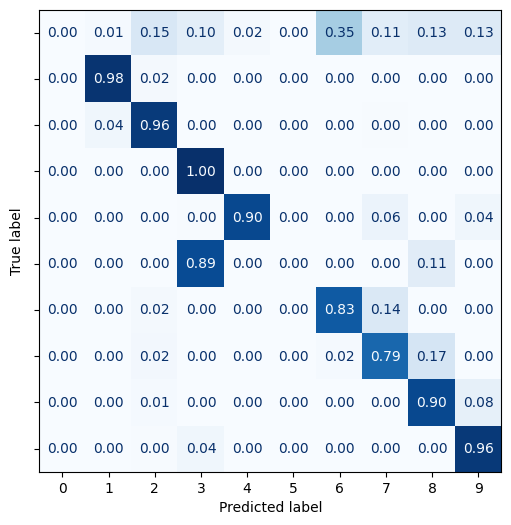

----------------------------------------
DT: depth=3, fold_idx=1


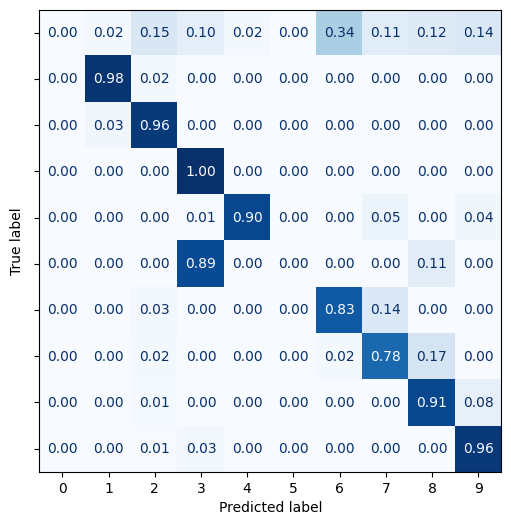

----------------------------------------
DT: depth=3, fold_idx=2


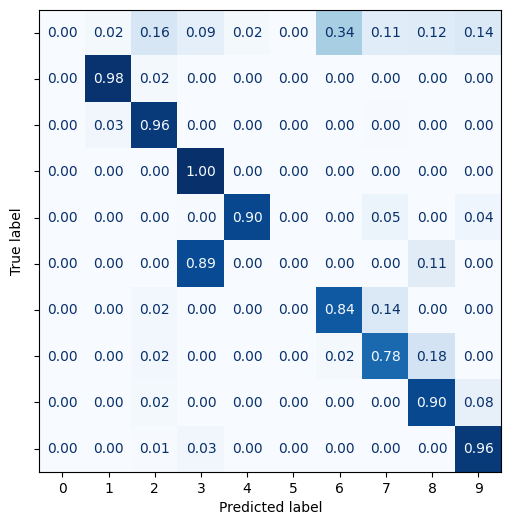

----------------------------------------
DT: depth=3, fold_idx=3


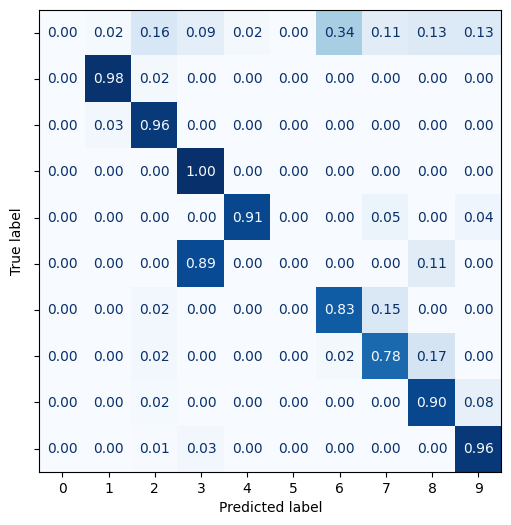

----------------------------------------
DT: depth=3, fold_idx=4


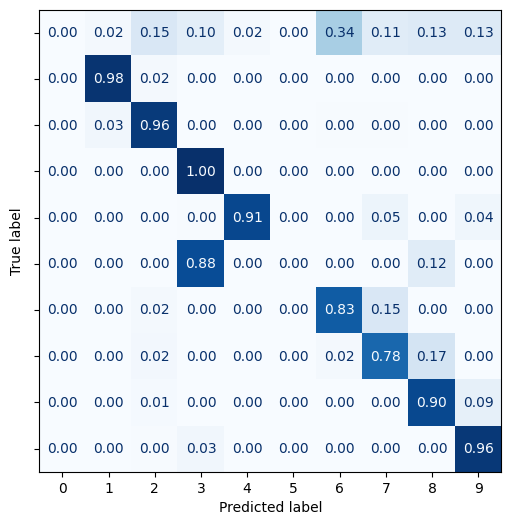

----------------------------------------
DT: depth=6, fold_idx=0


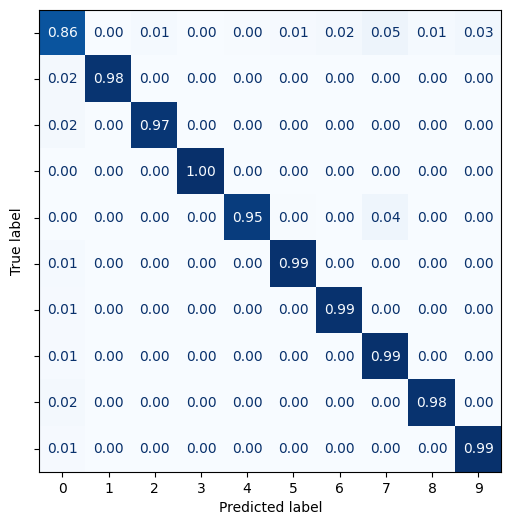

----------------------------------------
DT: depth=6, fold_idx=1


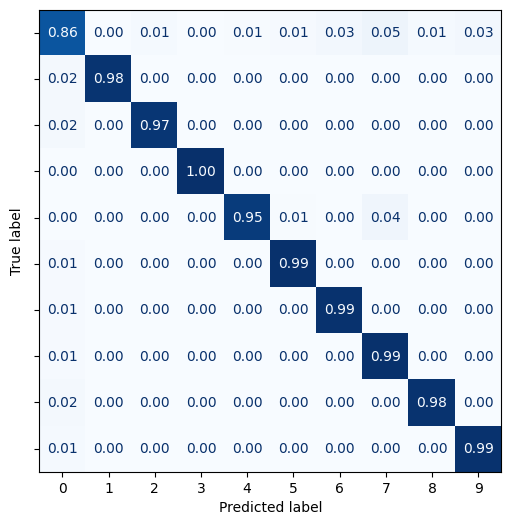

----------------------------------------
DT: depth=6, fold_idx=2


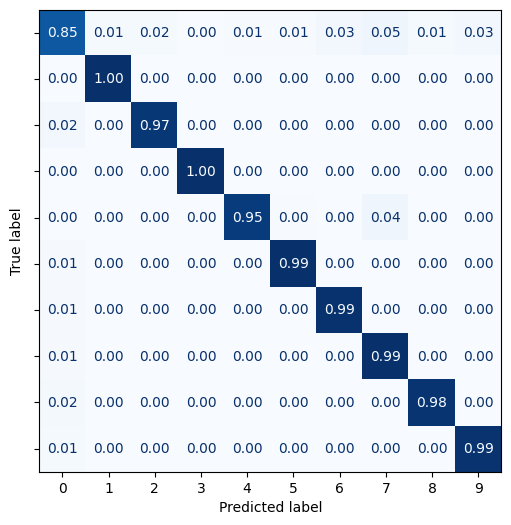

----------------------------------------
DT: depth=6, fold_idx=3


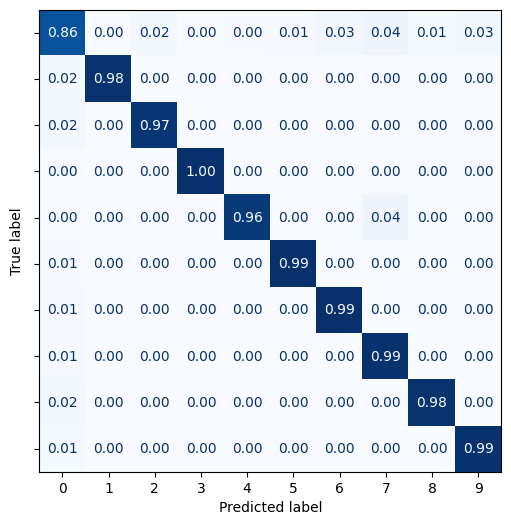

----------------------------------------
DT: depth=6, fold_idx=4


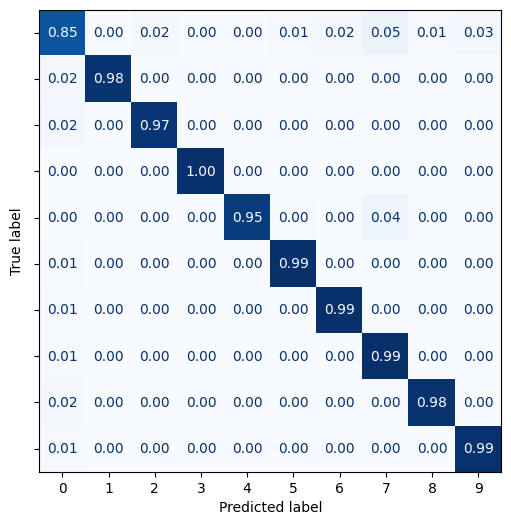

----------------------------------------
DT: depth=9, fold_idx=0


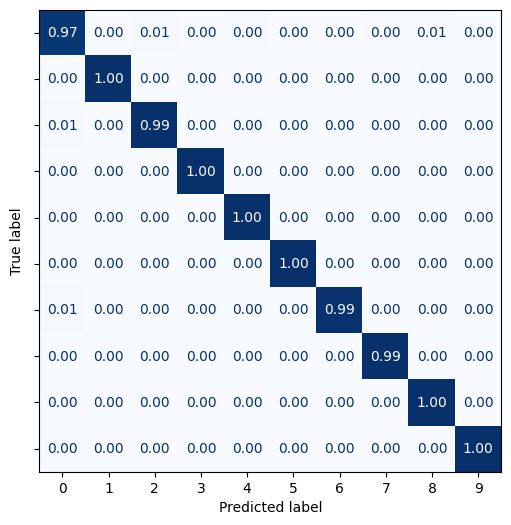

----------------------------------------
DT: depth=9, fold_idx=1


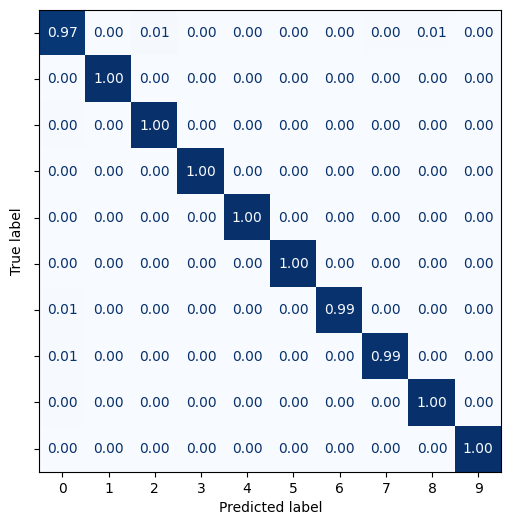

----------------------------------------
DT: depth=9, fold_idx=2


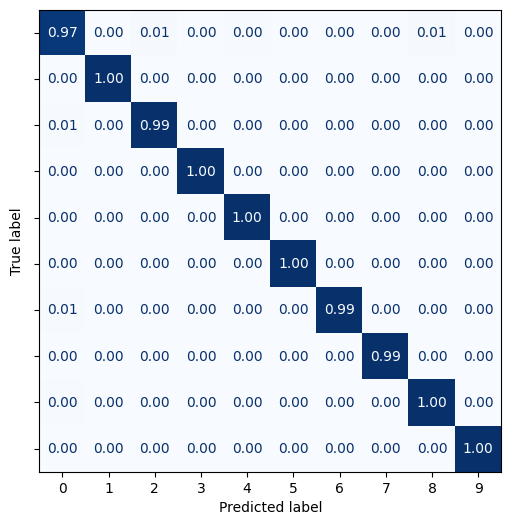

----------------------------------------
DT: depth=9, fold_idx=3


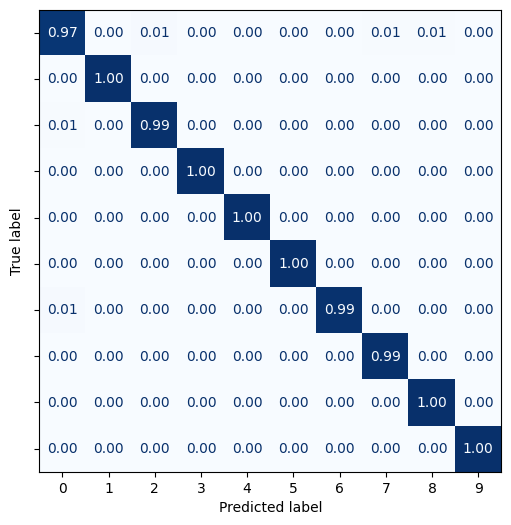

----------------------------------------
DT: depth=9, fold_idx=4


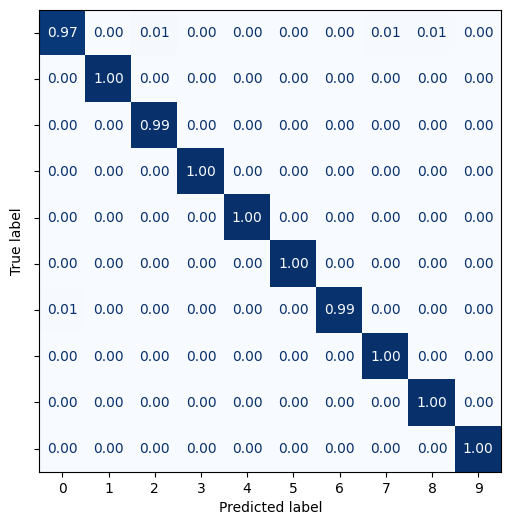

----------------------------------------


In [48]:
for depth in depths_range:
    label = 'dt__depth_%d' % (depth)
    accuracy_store_iot[label] = np.zeros(num_folds)
    precision_store_iot[label] = np.zeros(num_folds)
    recall_store_iot[label] = np.zeros(num_folds)
    tpr_store_iot[label] = np.zeros(num_folds)
    fpr_store_iot[label] = np.zeros(num_folds)
    fnr_store_iot[label] = np.zeros(num_folds)
    f1_store_iot[label] = np.zeros(num_folds)
    roc_auc_store_iot[label] = np.zeros(num_folds)
    cm_data_store_iot[label] = {}
    
    fold_idx = 0
    for train_index, test_index in skf.split(X, Y):
        print('DT: depth=%d, fold_idx=%d' % (depth, fold_idx))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
        dt = dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        y_score = dt.predict_proba(X_test)
        
        a, p, r, tpr, fpr, fnr, f1, roc_auc, cm_data = metrics_multiclass_dataset(dt, X_test, y_test, y_pred, y_score)
        accuracy_store_iot[label][fold_idx] = a
        precision_store_iot[label][fold_idx] = p
        recall_store_iot[label][fold_idx] = r
        tpr_store_iot[label][fold_idx] = tpr
        fpr_store_iot[label][fold_idx] = fpr
        fnr_store_iot[label][fold_idx] = fnr
        f1_store_iot[label][fold_idx] = f1
        roc_auc_store_iot[label][fold_idx] = roc_auc
        cm_data_store_iot[label][fold_idx] = cm_data
        
        fold_idx += 1

        print('-'*40)
    print('='*80)

## Random Forest

RF: depth=3, estimators=5, fold_idx=0


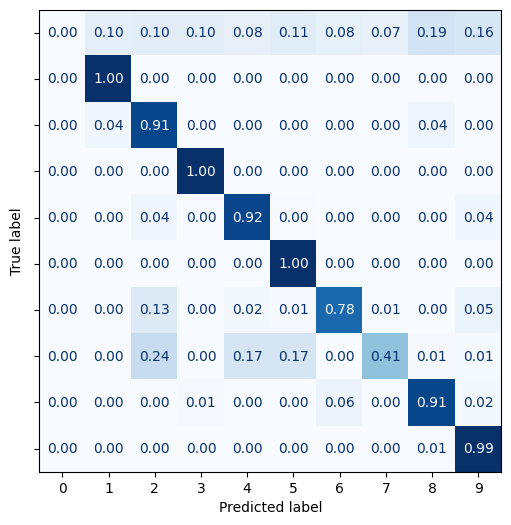

RF: depth=3, estimators=5, fold_idx=1


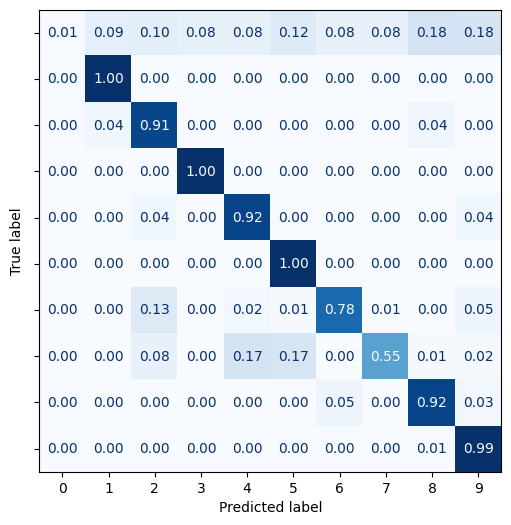

RF: depth=3, estimators=5, fold_idx=2


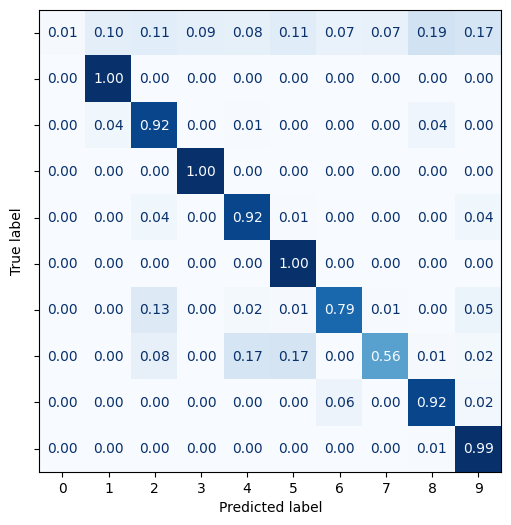

RF: depth=3, estimators=5, fold_idx=3


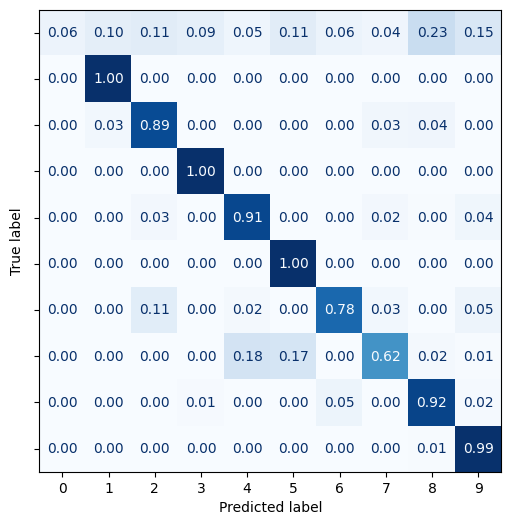

RF: depth=3, estimators=5, fold_idx=4


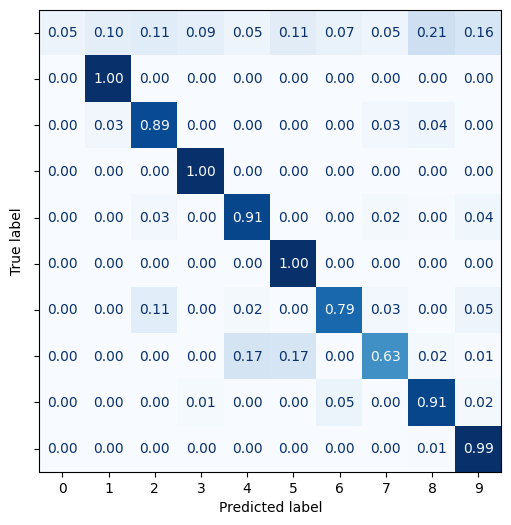

----------------------------------------
RF: depth=6, estimators=5, fold_idx=0


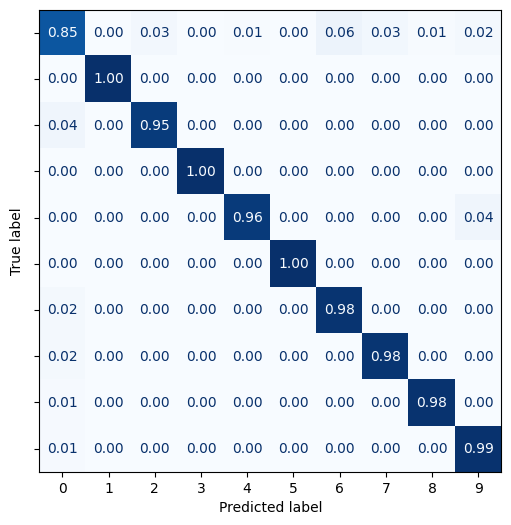

RF: depth=6, estimators=5, fold_idx=1


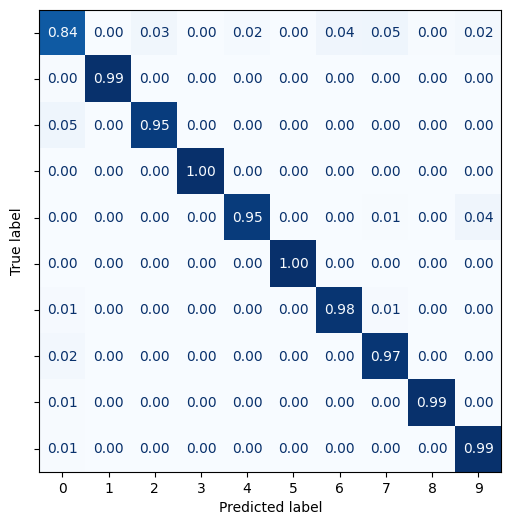

RF: depth=6, estimators=5, fold_idx=2


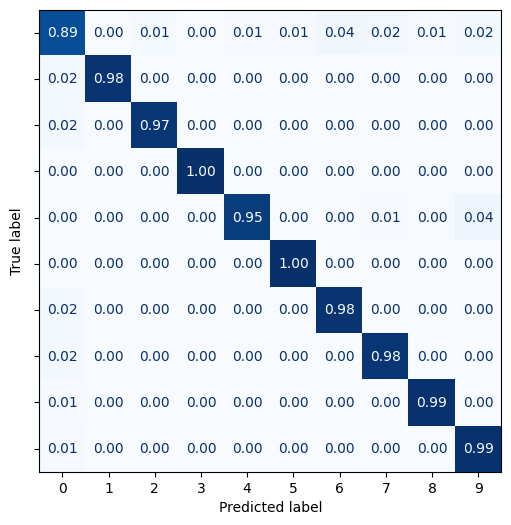

RF: depth=6, estimators=5, fold_idx=3


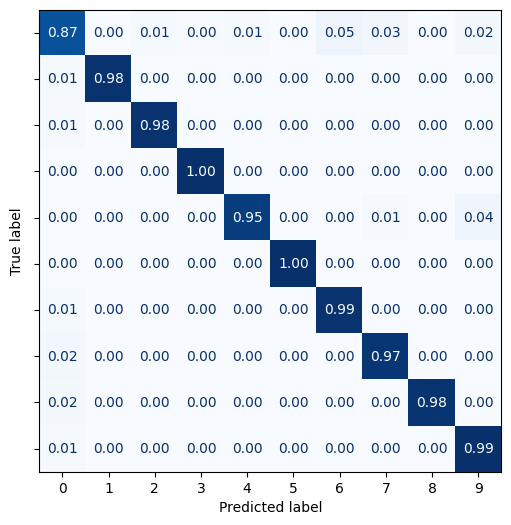

RF: depth=6, estimators=5, fold_idx=4


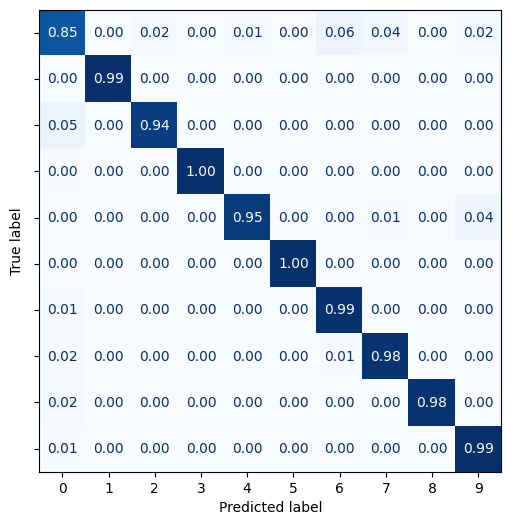

----------------------------------------
RF: depth=9, estimators=5, fold_idx=0


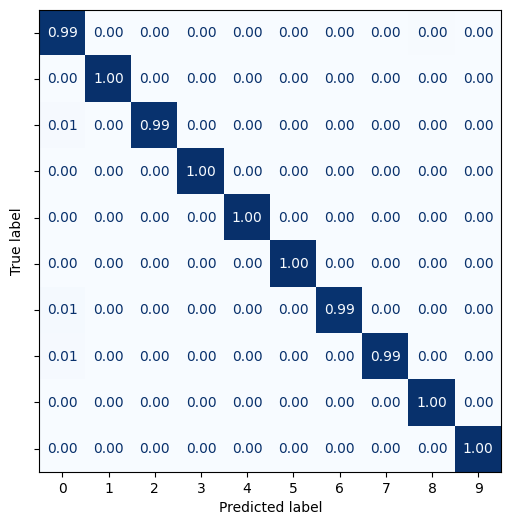

RF: depth=9, estimators=5, fold_idx=1


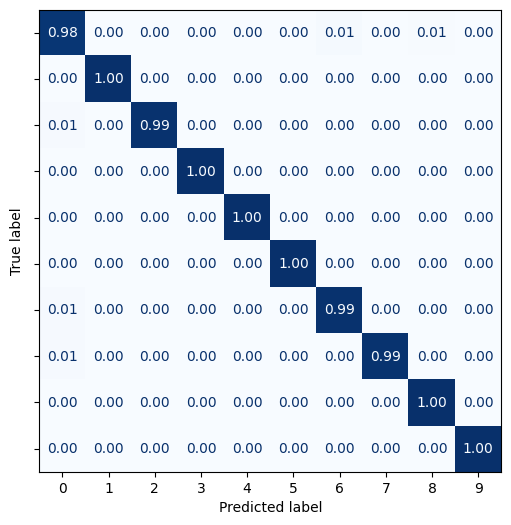

RF: depth=9, estimators=5, fold_idx=2


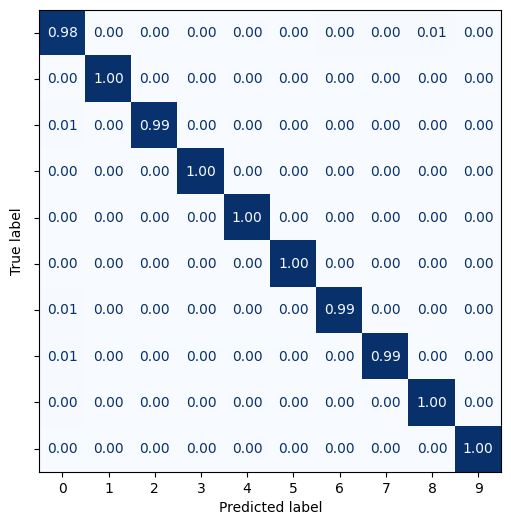

RF: depth=9, estimators=5, fold_idx=3


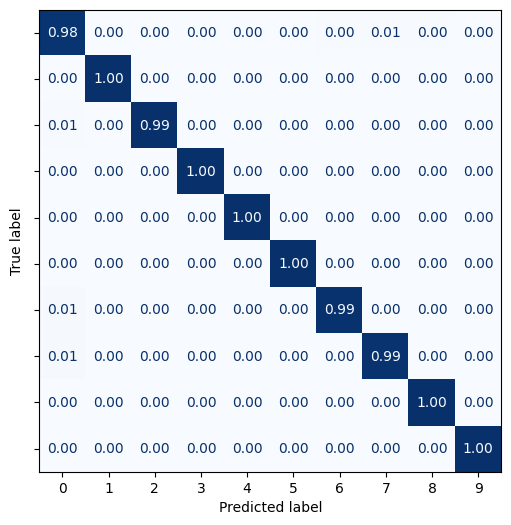

RF: depth=9, estimators=5, fold_idx=4


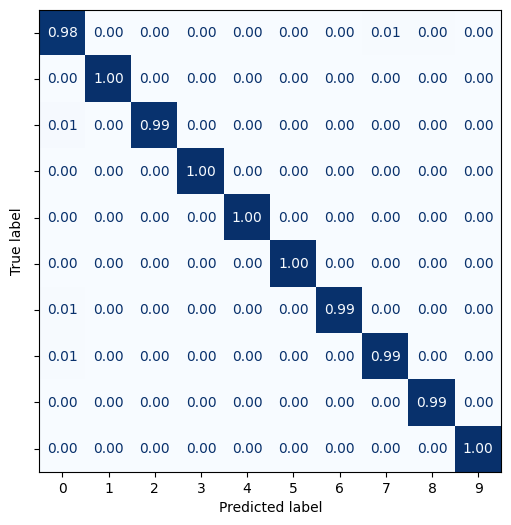

----------------------------------------


In [49]:
for depth in depths_range:
    for estimators in estimators_range:
        label = 'rf__depth_%d__estimators_%d' % (depth, estimators)
        accuracy_store_iot[label] = np.zeros(num_folds)
        precision_store_iot[label] = np.zeros(num_folds)
        recall_store_iot[label] = np.zeros(num_folds)
        tpr_store_iot[label] = np.zeros(num_folds)
        fpr_store_iot[label] = np.zeros(num_folds)
        fnr_store_iot[label] = np.zeros(num_folds)
        f1_store_iot[label] = np.zeros(num_folds)
        roc_auc_store_iot[label] = np.zeros(num_folds)
        cm_data_store_iot[label] = {}

        fold_idx = 0
        for train_index, test_index in skf.split(X, Y):
            print('RF: depth=%d, estimators=%d, fold_idx=%d' % (depth, estimators, fold_idx))
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            rf = RandomForestClassifier(criterion='entropy', max_depth=depth, n_estimators=estimators, random_state=0)
            rf = rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            y_score = rf.predict_proba(X_test)

            a, p, r, tpr, fpr, fnr, f1, roc_auc, cm_data = metrics_multiclass_dataset(rf, X_test, y_test, y_pred, y_score)
            accuracy_store_iot[label][fold_idx] = a
            precision_store_iot[label][fold_idx] = p
            recall_store_iot[label][fold_idx] = r
            tpr_store_iot[label][fold_idx] = tpr
            fpr_store_iot[label][fold_idx] = fpr
            fnr_store_iot[label][fold_idx] = fnr
            f1_store_iot[label][fold_idx] = f1
            roc_auc_store_iot[label][fold_idx] = roc_auc
            cm_data_store_iot[label][fold_idx] = cm_data
        
            fold_idx += 1

        print('-'*40)
    print('='*80)


## Binary NN

BNN [32, 16, 10] , fold_idx=0

Epoch 1: val_accuracy improved from -inf to 0.77031, saving model to models/bnn__iot__32_16_10__fold0

Epoch 2: val_accuracy improved from 0.77031 to 0.87680, saving model to models/bnn__iot__32_16_10__fold0

Epoch 3: val_accuracy improved from 0.87680 to 0.90857, saving model to models/bnn__iot__32_16_10__fold0

Epoch 4: val_accuracy improved from 0.90857 to 0.91830, saving model to models/bnn__iot__32_16_10__fold0

Epoch 5: val_accuracy did not improve from 0.91830

Epoch 6: val_accuracy did not improve from 0.91830

Epoch 7: val_accuracy improved from 0.91830 to 0.92203, saving model to models/bnn__iot__32_16_10__fold0

Epoch 8: val_accuracy did not improve from 0.92203

Epoch 9: val_accuracy improved from 0.92203 to 0.92747, saving model to models/bnn__iot__32_16_10__fold0

Epoch 10: val_accuracy did not improve from 0.92747

Epoch 11: val_accuracy did not improve from 0.92747

Epoch 12: val_accuracy improved from 0.92747 to 0.92864, saving model to m

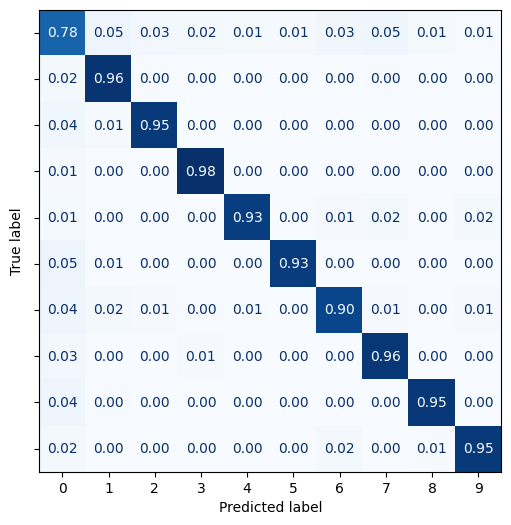

----------------------------------------
BNN [32, 16, 10] , fold_idx=1

Epoch 1: val_accuracy improved from -inf to 0.77863, saving model to models/bnn__iot__32_16_10__fold1

Epoch 2: val_accuracy improved from 0.77863 to 0.87735, saving model to models/bnn__iot__32_16_10__fold1

Epoch 3: val_accuracy improved from 0.87735 to 0.89658, saving model to models/bnn__iot__32_16_10__fold1

Epoch 4: val_accuracy improved from 0.89658 to 0.89801, saving model to models/bnn__iot__32_16_10__fold1

Epoch 5: val_accuracy improved from 0.89801 to 0.91469, saving model to models/bnn__iot__32_16_10__fold1

Epoch 6: val_accuracy improved from 0.91469 to 0.91773, saving model to models/bnn__iot__32_16_10__fold1

Epoch 7: val_accuracy improved from 0.91773 to 0.91864, saving model to models/bnn__iot__32_16_10__fold1

Epoch 8: val_accuracy improved from 0.91864 to 0.92195, saving model to models/bnn__iot__32_16_10__fold1

Epoch 9: val_accuracy did not improve from 0.92195

Epoch 10: val_accuracy did not 

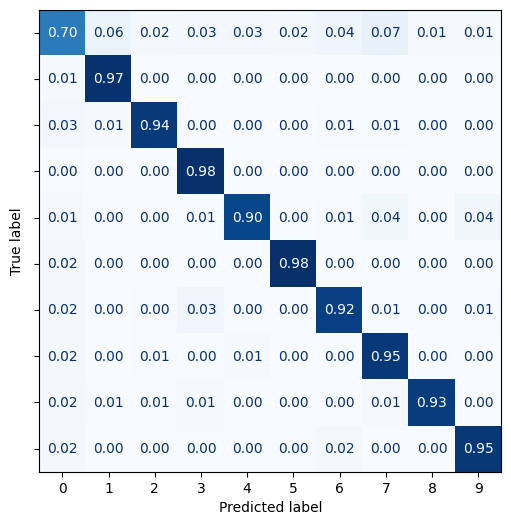

----------------------------------------
BNN [32, 16, 10] , fold_idx=2

Epoch 1: val_accuracy improved from -inf to 0.75865, saving model to models/bnn__iot__32_16_10__fold2

Epoch 2: val_accuracy improved from 0.75865 to 0.84155, saving model to models/bnn__iot__32_16_10__fold2

Epoch 3: val_accuracy improved from 0.84155 to 0.89729, saving model to models/bnn__iot__32_16_10__fold2

Epoch 4: val_accuracy improved from 0.89729 to 0.91072, saving model to models/bnn__iot__32_16_10__fold2

Epoch 5: val_accuracy improved from 0.91072 to 0.91197, saving model to models/bnn__iot__32_16_10__fold2

Epoch 6: val_accuracy improved from 0.91197 to 0.91585, saving model to models/bnn__iot__32_16_10__fold2

Epoch 7: val_accuracy improved from 0.91585 to 0.91926, saving model to models/bnn__iot__32_16_10__fold2

Epoch 8: val_accuracy improved from 0.91926 to 0.92723, saving model to models/bnn__iot__32_16_10__fold2

Epoch 9: val_accuracy did not improve from 0.92723

Epoch 10: val_accuracy did not 

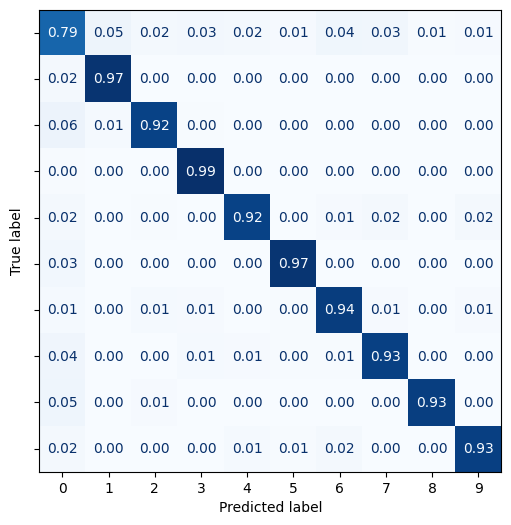

----------------------------------------
BNN [32, 16, 10] , fold_idx=3

Epoch 1: val_accuracy improved from -inf to 0.77377, saving model to models/bnn__iot__32_16_10__fold3

Epoch 2: val_accuracy improved from 0.77377 to 0.87328, saving model to models/bnn__iot__32_16_10__fold3

Epoch 3: val_accuracy improved from 0.87328 to 0.90155, saving model to models/bnn__iot__32_16_10__fold3

Epoch 4: val_accuracy improved from 0.90155 to 0.90234, saving model to models/bnn__iot__32_16_10__fold3

Epoch 5: val_accuracy improved from 0.90234 to 0.92052, saving model to models/bnn__iot__32_16_10__fold3

Epoch 6: val_accuracy improved from 0.92052 to 0.92298, saving model to models/bnn__iot__32_16_10__fold3

Epoch 7: val_accuracy did not improve from 0.92298

Epoch 8: val_accuracy did not improve from 0.92298

Epoch 9: val_accuracy improved from 0.92298 to 0.93508, saving model to models/bnn__iot__32_16_10__fold3

Epoch 10: val_accuracy did not improve from 0.93508

Epoch 11: val_accuracy did not i

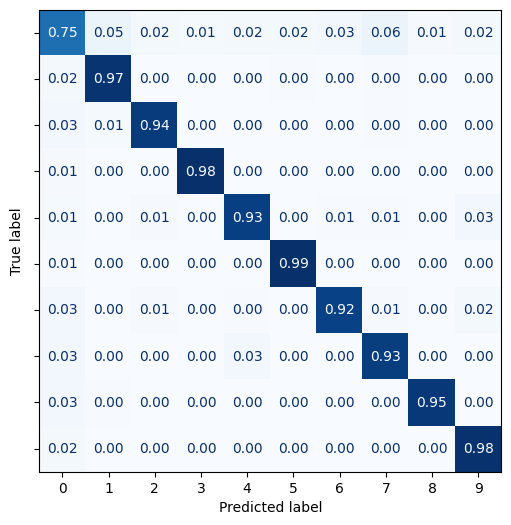

----------------------------------------
BNN [32, 16, 10] , fold_idx=4

Epoch 1: val_accuracy improved from -inf to 0.73207, saving model to models/bnn__iot__32_16_10__fold4

Epoch 2: val_accuracy improved from 0.73207 to 0.84884, saving model to models/bnn__iot__32_16_10__fold4

Epoch 3: val_accuracy improved from 0.84884 to 0.89093, saving model to models/bnn__iot__32_16_10__fold4

Epoch 4: val_accuracy did not improve from 0.89093

Epoch 5: val_accuracy improved from 0.89093 to 0.90660, saving model to models/bnn__iot__32_16_10__fold4

Epoch 6: val_accuracy improved from 0.90660 to 0.92464, saving model to models/bnn__iot__32_16_10__fold4

Epoch 7: val_accuracy improved from 0.92464 to 0.92492, saving model to models/bnn__iot__32_16_10__fold4

Epoch 8: val_accuracy did not improve from 0.92492

Epoch 9: val_accuracy did not improve from 0.92492

Epoch 10: val_accuracy improved from 0.92492 to 0.92580, saving model to models/bnn__iot__32_16_10__fold4

Epoch 11: val_accuracy did not i

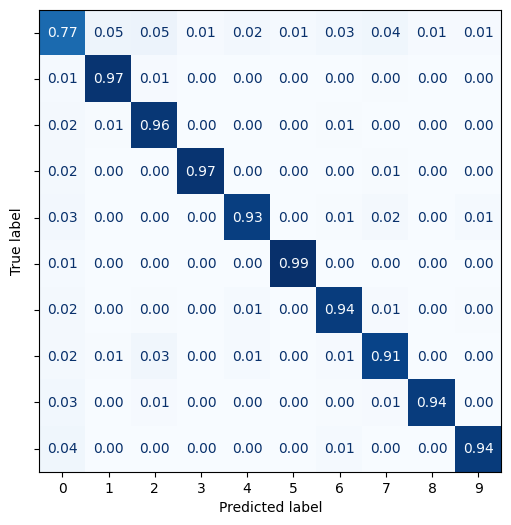

----------------------------------------
BNN [64, 32, 10] , fold_idx=0

Epoch 1: val_accuracy improved from -inf to 0.85353, saving model to models/bnn__iot__64_32_10__fold0

Epoch 2: val_accuracy improved from 0.85353 to 0.91937, saving model to models/bnn__iot__64_32_10__fold0

Epoch 3: val_accuracy improved from 0.91937 to 0.93736, saving model to models/bnn__iot__64_32_10__fold0

Epoch 4: val_accuracy improved from 0.93736 to 0.94402, saving model to models/bnn__iot__64_32_10__fold0

Epoch 5: val_accuracy improved from 0.94402 to 0.95049, saving model to models/bnn__iot__64_32_10__fold0

Epoch 6: val_accuracy improved from 0.95049 to 0.95355, saving model to models/bnn__iot__64_32_10__fold0

Epoch 7: val_accuracy improved from 0.95355 to 0.95536, saving model to models/bnn__iot__64_32_10__fold0

Epoch 8: val_accuracy improved from 0.95536 to 0.95584, saving model to models/bnn__iot__64_32_10__fold0

Epoch 9: val_accuracy improved from 0.95584 to 0.95771, saving model to models/bnn_

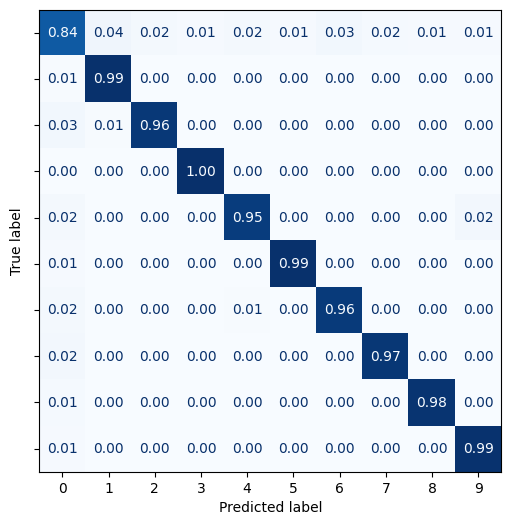

----------------------------------------
BNN [64, 32, 10] , fold_idx=1

Epoch 1: val_accuracy improved from -inf to 0.86579, saving model to models/bnn__iot__64_32_10__fold1

Epoch 2: val_accuracy improved from 0.86579 to 0.91374, saving model to models/bnn__iot__64_32_10__fold1

Epoch 3: val_accuracy improved from 0.91374 to 0.93383, saving model to models/bnn__iot__64_32_10__fold1

Epoch 4: val_accuracy improved from 0.93383 to 0.94306, saving model to models/bnn__iot__64_32_10__fold1

Epoch 5: val_accuracy improved from 0.94306 to 0.94727, saving model to models/bnn__iot__64_32_10__fold1

Epoch 6: val_accuracy improved from 0.94727 to 0.95047, saving model to models/bnn__iot__64_32_10__fold1

Epoch 7: val_accuracy improved from 0.95047 to 0.95316, saving model to models/bnn__iot__64_32_10__fold1

Epoch 8: val_accuracy improved from 0.95316 to 0.95349, saving model to models/bnn__iot__64_32_10__fold1

Epoch 9: val_accuracy improved from 0.95349 to 0.95427, saving model to models/bnn_

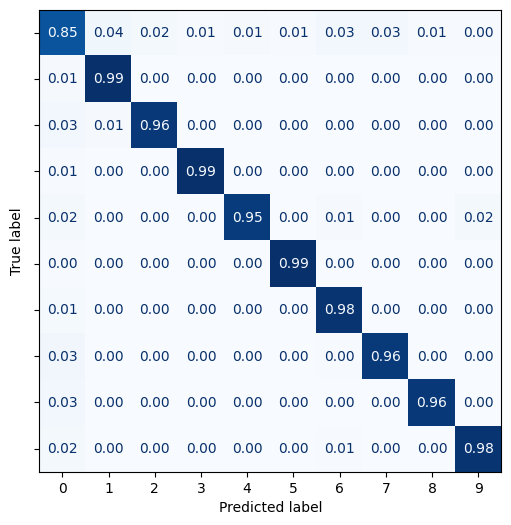

----------------------------------------
BNN [64, 32, 10] , fold_idx=2

Epoch 1: val_accuracy improved from -inf to 0.84373, saving model to models/bnn__iot__64_32_10__fold2

Epoch 2: val_accuracy improved from 0.84373 to 0.92286, saving model to models/bnn__iot__64_32_10__fold2

Epoch 3: val_accuracy improved from 0.92286 to 0.93391, saving model to models/bnn__iot__64_32_10__fold2

Epoch 4: val_accuracy improved from 0.93391 to 0.94409, saving model to models/bnn__iot__64_32_10__fold2

Epoch 5: val_accuracy improved from 0.94409 to 0.94780, saving model to models/bnn__iot__64_32_10__fold2

Epoch 6: val_accuracy improved from 0.94780 to 0.95117, saving model to models/bnn__iot__64_32_10__fold2

Epoch 7: val_accuracy improved from 0.95117 to 0.95413, saving model to models/bnn__iot__64_32_10__fold2

Epoch 8: val_accuracy improved from 0.95413 to 0.95636, saving model to models/bnn__iot__64_32_10__fold2

Epoch 9: val_accuracy did not improve from 0.95636

Epoch 10: val_accuracy did not 

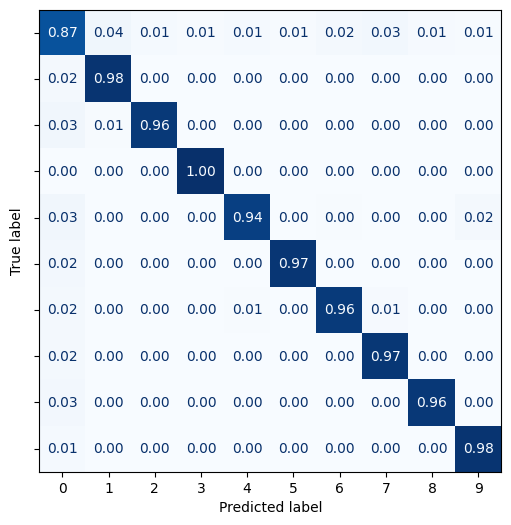

----------------------------------------
BNN [64, 32, 10] , fold_idx=3

Epoch 1: val_accuracy improved from -inf to 0.83598, saving model to models/bnn__iot__64_32_10__fold3

Epoch 2: val_accuracy improved from 0.83598 to 0.91605, saving model to models/bnn__iot__64_32_10__fold3

Epoch 3: val_accuracy improved from 0.91605 to 0.93337, saving model to models/bnn__iot__64_32_10__fold3

Epoch 4: val_accuracy improved from 0.93337 to 0.94464, saving model to models/bnn__iot__64_32_10__fold3

Epoch 5: val_accuracy improved from 0.94464 to 0.94641, saving model to models/bnn__iot__64_32_10__fold3

Epoch 6: val_accuracy improved from 0.94641 to 0.94787, saving model to models/bnn__iot__64_32_10__fold3

Epoch 7: val_accuracy improved from 0.94787 to 0.95319, saving model to models/bnn__iot__64_32_10__fold3

Epoch 8: val_accuracy improved from 0.95319 to 0.95669, saving model to models/bnn__iot__64_32_10__fold3

Epoch 9: val_accuracy did not improve from 0.95669

Epoch 10: val_accuracy improved

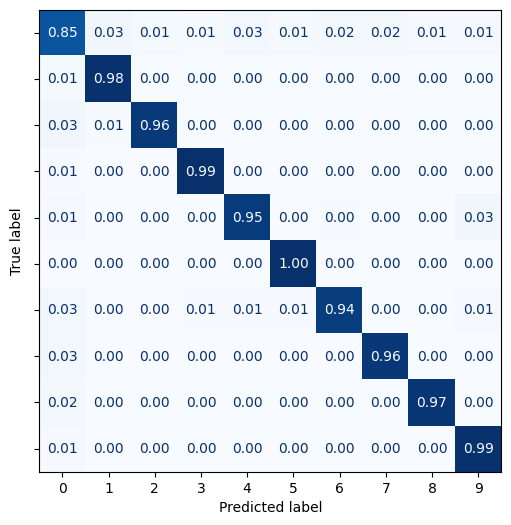

----------------------------------------
BNN [64, 32, 10] , fold_idx=4

Epoch 1: val_accuracy improved from -inf to 0.86041, saving model to models/bnn__iot__64_32_10__fold4

Epoch 2: val_accuracy improved from 0.86041 to 0.91601, saving model to models/bnn__iot__64_32_10__fold4

Epoch 3: val_accuracy improved from 0.91601 to 0.93449, saving model to models/bnn__iot__64_32_10__fold4

Epoch 4: val_accuracy improved from 0.93449 to 0.93944, saving model to models/bnn__iot__64_32_10__fold4

Epoch 5: val_accuracy improved from 0.93944 to 0.94771, saving model to models/bnn__iot__64_32_10__fold4

Epoch 6: val_accuracy did not improve from 0.94771

Epoch 7: val_accuracy improved from 0.94771 to 0.95073, saving model to models/bnn__iot__64_32_10__fold4

Epoch 8: val_accuracy improved from 0.95073 to 0.95503, saving model to models/bnn__iot__64_32_10__fold4

Epoch 9: val_accuracy improved from 0.95503 to 0.95588, saving model to models/bnn__iot__64_32_10__fold4

Epoch 10: val_accuracy improved

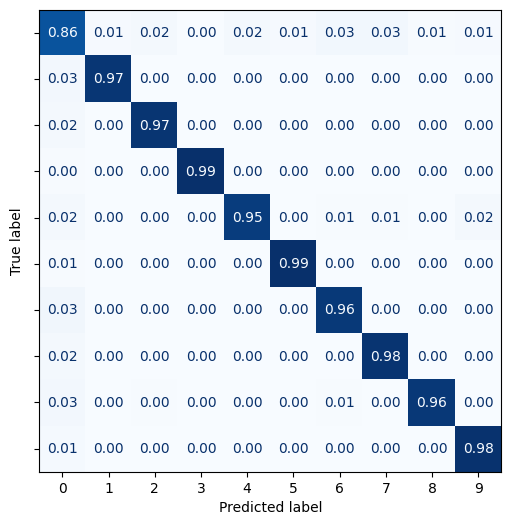

----------------------------------------
BNN [128, 64, 10] , fold_idx=0

Epoch 1: val_accuracy improved from -inf to 0.90256, saving model to models/bnn__iot__128_64_10__fold0

Epoch 2: val_accuracy improved from 0.90256 to 0.93841, saving model to models/bnn__iot__128_64_10__fold0

Epoch 3: val_accuracy improved from 0.93841 to 0.95309, saving model to models/bnn__iot__128_64_10__fold0

Epoch 4: val_accuracy improved from 0.95309 to 0.95891, saving model to models/bnn__iot__128_64_10__fold0

Epoch 5: val_accuracy improved from 0.95891 to 0.96048, saving model to models/bnn__iot__128_64_10__fold0

Epoch 6: val_accuracy improved from 0.96048 to 0.96553, saving model to models/bnn__iot__128_64_10__fold0

Epoch 7: val_accuracy improved from 0.96553 to 0.96786, saving model to models/bnn__iot__128_64_10__fold0

Epoch 8: val_accuracy improved from 0.96786 to 0.96987, saving model to models/bnn__iot__128_64_10__fold0

Epoch 9: val_accuracy improved from 0.96987 to 0.97052, saving model to mo

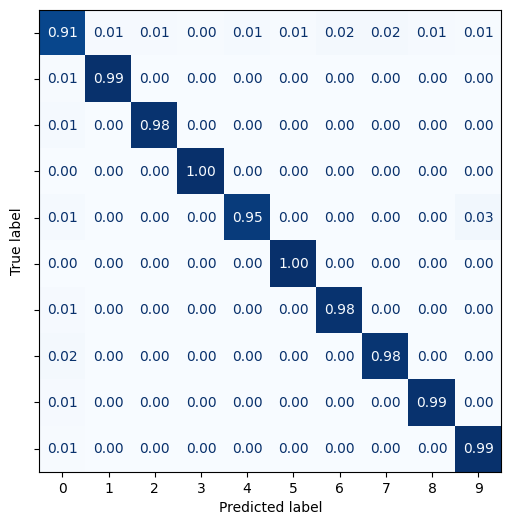

----------------------------------------
BNN [128, 64, 10] , fold_idx=1

Epoch 1: val_accuracy improved from -inf to 0.90601, saving model to models/bnn__iot__128_64_10__fold1

Epoch 2: val_accuracy improved from 0.90601 to 0.94122, saving model to models/bnn__iot__128_64_10__fold1

Epoch 3: val_accuracy improved from 0.94122 to 0.95179, saving model to models/bnn__iot__128_64_10__fold1

Epoch 4: val_accuracy improved from 0.95179 to 0.95820, saving model to models/bnn__iot__128_64_10__fold1

Epoch 5: val_accuracy improved from 0.95820 to 0.96310, saving model to models/bnn__iot__128_64_10__fold1

Epoch 6: val_accuracy improved from 0.96310 to 0.96358, saving model to models/bnn__iot__128_64_10__fold1

Epoch 7: val_accuracy improved from 0.96358 to 0.96542, saving model to models/bnn__iot__128_64_10__fold1

Epoch 8: val_accuracy improved from 0.96542 to 0.96749, saving model to models/bnn__iot__128_64_10__fold1

Epoch 9: val_accuracy improved from 0.96749 to 0.96945, saving model to mo

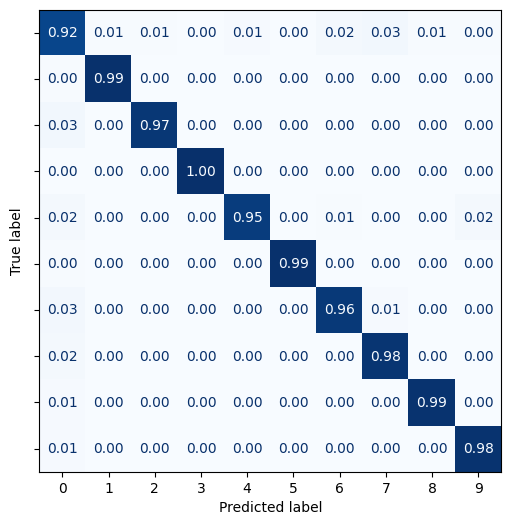

----------------------------------------
BNN [128, 64, 10] , fold_idx=2

Epoch 1: val_accuracy improved from -inf to 0.90652, saving model to models/bnn__iot__128_64_10__fold2

Epoch 2: val_accuracy improved from 0.90652 to 0.94173, saving model to models/bnn__iot__128_64_10__fold2

Epoch 3: val_accuracy improved from 0.94173 to 0.95372, saving model to models/bnn__iot__128_64_10__fold2

Epoch 4: val_accuracy improved from 0.95372 to 0.95563, saving model to models/bnn__iot__128_64_10__fold2

Epoch 5: val_accuracy improved from 0.95563 to 0.96124, saving model to models/bnn__iot__128_64_10__fold2

Epoch 6: val_accuracy improved from 0.96124 to 0.96313, saving model to models/bnn__iot__128_64_10__fold2

Epoch 7: val_accuracy improved from 0.96313 to 0.96533, saving model to models/bnn__iot__128_64_10__fold2

Epoch 8: val_accuracy improved from 0.96533 to 0.96629, saving model to models/bnn__iot__128_64_10__fold2

Epoch 9: val_accuracy improved from 0.96629 to 0.96657, saving model to mo

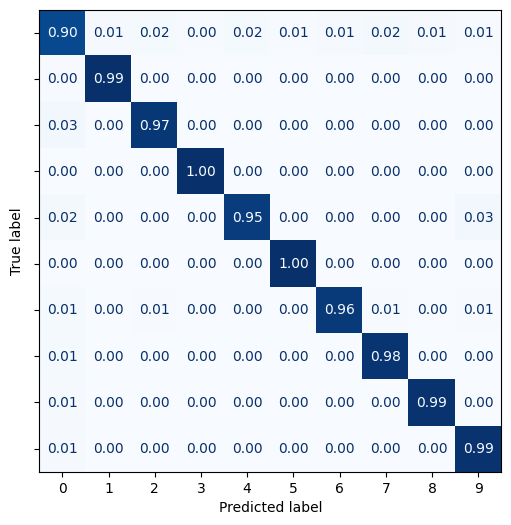

----------------------------------------
BNN [128, 64, 10] , fold_idx=3

Epoch 1: val_accuracy improved from -inf to 0.90615, saving model to models/bnn__iot__128_64_10__fold3

Epoch 2: val_accuracy improved from 0.90615 to 0.94063, saving model to models/bnn__iot__128_64_10__fold3

Epoch 3: val_accuracy improved from 0.94063 to 0.95183, saving model to models/bnn__iot__128_64_10__fold3

Epoch 4: val_accuracy improved from 0.95183 to 0.95690, saving model to models/bnn__iot__128_64_10__fold3

Epoch 5: val_accuracy improved from 0.95690 to 0.96099, saving model to models/bnn__iot__128_64_10__fold3

Epoch 6: val_accuracy improved from 0.96099 to 0.96320, saving model to models/bnn__iot__128_64_10__fold3

Epoch 7: val_accuracy improved from 0.96320 to 0.96594, saving model to models/bnn__iot__128_64_10__fold3

Epoch 8: val_accuracy improved from 0.96594 to 0.96653, saving model to models/bnn__iot__128_64_10__fold3

Epoch 9: val_accuracy improved from 0.96653 to 0.96990, saving model to mo

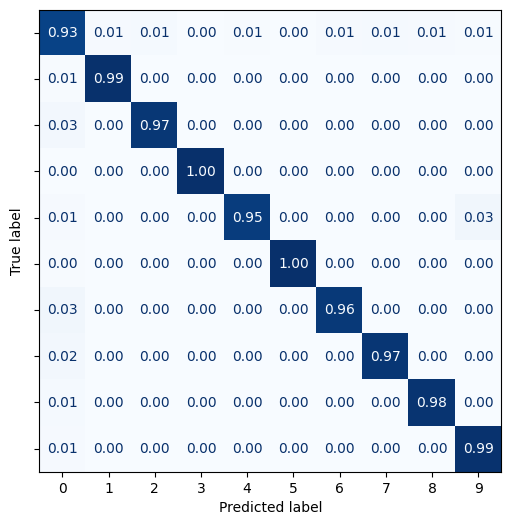

----------------------------------------
BNN [128, 64, 10] , fold_idx=4

Epoch 1: val_accuracy improved from -inf to 0.90760, saving model to models/bnn__iot__128_64_10__fold4

Epoch 2: val_accuracy improved from 0.90760 to 0.94028, saving model to models/bnn__iot__128_64_10__fold4

Epoch 3: val_accuracy improved from 0.94028 to 0.95429, saving model to models/bnn__iot__128_64_10__fold4

Epoch 4: val_accuracy improved from 0.95429 to 0.95570, saving model to models/bnn__iot__128_64_10__fold4

Epoch 5: val_accuracy improved from 0.95570 to 0.96299, saving model to models/bnn__iot__128_64_10__fold4

Epoch 6: val_accuracy improved from 0.96299 to 0.96443, saving model to models/bnn__iot__128_64_10__fold4

Epoch 7: val_accuracy improved from 0.96443 to 0.96840, saving model to models/bnn__iot__128_64_10__fold4

Epoch 8: val_accuracy improved from 0.96840 to 0.97116, saving model to models/bnn__iot__128_64_10__fold4

Epoch 9: val_accuracy improved from 0.97116 to 0.97147, saving model to mo

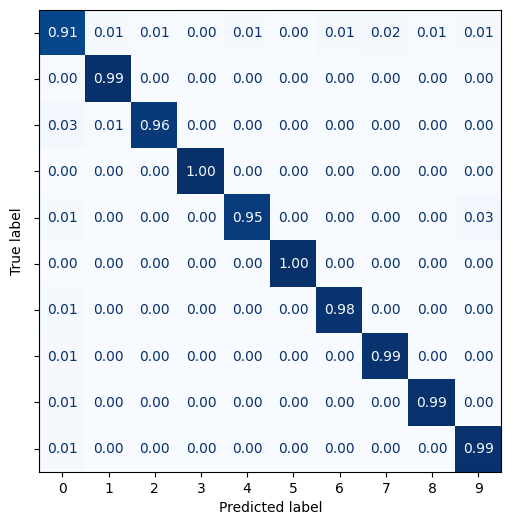

----------------------------------------


In [50]:
for neurons in bnn_models:
    label = 'bnn__%s' % ('_'.join(map(str, neurons)))
    accuracy_store_iot[label] = np.zeros(num_folds)
    precision_store_iot[label] = np.zeros(num_folds)
    recall_store_iot[label] = np.zeros(num_folds)
    tpr_store_iot[label] = np.zeros(num_folds)
    fpr_store_iot[label] = np.zeros(num_folds)
    fnr_store_iot[label] = np.zeros(num_folds)
    f1_store_iot[label] = np.zeros(num_folds)
    roc_auc_store_iot[label] = np.zeros(num_folds)
    cm_data_store_iot[label] = {}
    
    fold_idx = 0
    for train_index, test_index in skf.split(X, Y):
        print('BNN', neurons ,', fold_idx=%d' % (fold_idx))
        X_train, X_test = X_bin[train_index], X_bin[test_index]
        y_train, y_test = Y_cat[train_index], Y_cat[test_index]
        
        model = build_bnn_model(neurons, X_bin.shape[1])   
        fname = 'bnn__iot__%s__fold%d' % ('_'.join(map(str, neurons)), fold_idx)
        
        model_checkpoint_callback = ModelCheckpoint(
            filepath='models/' + fname,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True,
            save_weights_only=True,
            save_format="keras",
            verbose=1)
        
        if not os.path.isfile('models/' + fname):
            train_history = model.fit(X_train, y_train, 
                              batch_size=batch_size, 
                              epochs=train_epochs,
                              verbose=0,
                              validation_data=(X_test, y_test),
                              callbacks=[model_checkpoint_callback])
            
            # Reload best weights
            model.load_weights('models/' + fname)
        else:
            # Reload stored weights
            print('Loading models/' + fname)
            model.load_weights('models/' + fname)

        
        y_score = model.predict(X_test)
        # y_pred = model.predict_classes(X_test)
        y_pred = [class_names[i] for i in np.argmax(y_score, axis=1)]
        
        a, p, r, tpr, fpr, fnr, f1, roc_auc, cm_data = metrics_multiclass_dataset(model, X_test, y_test, y_pred, y_score, is_bnn=True)
        accuracy_store_iot[label][fold_idx] = a
        precision_store_iot[label][fold_idx] = p
        recall_store_iot[label][fold_idx] = r
        tpr_store_iot[label][fold_idx] = tpr
        fpr_store_iot[label][fold_idx] = fpr
        fnr_store_iot[label][fold_idx] = fnr
        f1_store_iot[label][fold_idx] = f1
        roc_auc_store_iot[label][fold_idx] = roc_auc
        cm_data_store_iot[label][fold_idx] = cm_data
        
        fold_idx += 1

        print('-'*40)
    print('='*80)

In [51]:
for store,metric in zip([accuracy_store_iot, precision_store_iot, recall_store_iot,
                         fnr_store_iot, fpr_store_iot, f1_store_iot, roc_auc_store_iot],
                        ['Accuracy', 'Precision', 'Recall', 'FNR', 'FPR', 'F1-score', 'ROC-AUC']):
    print('[%s]' % metric)
    for key in store:
        print('%s: %.1f ± %.1f' % (key, 100*store[key].mean(), 100*store[key].std()))
    print()

[Accuracy]
dt__depth_3: 73.1 ± 0.0
dt__depth_6: 97.0 ± 0.1
dt__depth_9: 99.4 ± 0.0
rf__depth_3__estimators_5: 80.9 ± 0.9
rf__depth_6__estimators_5: 96.9 ± 0.2
rf__depth_9__estimators_5: 99.4 ± 0.0
bnn__32_16_10: 92.9 ± 0.4
bnn__64_32_10: 96.0 ± 0.1
bnn__128_64_10: 97.5 ± 0.2

[Precision]
dt__depth_3: 81.0 ± 0.0
dt__depth_6: 97.0 ± 0.0
dt__depth_9: 99.4 ± 0.0
rf__depth_3__estimators_5: 82.7 ± 0.7
rf__depth_6__estimators_5: 96.9 ± 0.2
rf__depth_9__estimators_5: 99.4 ± 0.0
bnn__32_16_10: 93.0 ± 0.4
bnn__64_32_10: 96.1 ± 0.1
bnn__128_64_10: 97.5 ± 0.2

[Recall]
dt__depth_3: 73.1 ± 0.0
dt__depth_6: 97.0 ± 0.1
dt__depth_9: 99.4 ± 0.0
rf__depth_3__estimators_5: 80.9 ± 0.9
rf__depth_6__estimators_5: 96.9 ± 0.2
rf__depth_9__estimators_5: 99.4 ± 0.0
bnn__32_16_10: 92.9 ± 0.4
bnn__64_32_10: 96.0 ± 0.1
bnn__128_64_10: 97.5 ± 0.2

[FNR]
dt__depth_3: 26.9 ± 0.0
dt__depth_6: 3.0 ± 0.1
dt__depth_9: 0.6 ± 0.0
rf__depth_3__estimators_5: 19.1 ± 0.9
rf__depth_6__estimators_5: 3.1 ± 0.2
rf__depth_9__estima